# Capstone Modelling

In [ ]:
!python --version

Python 3.10.12


In [ ]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 901.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 28.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
shared_drive_path = '/content/drive/MyDrive/Capstone Dataset 80:20/training'
if os.path.exists(shared_drive_path):
    # List all items in the shared_drive_path
    all_items = os.listdir(shared_drive_path)

    # Filter out directories only
    directories = [item for item in all_items if os.path.isdir(os.path.join(shared_drive_path, item))]

    # Iterate through each directory and count the number of items
    for directory in directories:
        dir_path = os.path.join(shared_drive_path, directory)
        num_items = len(os.listdir(dir_path))
        print(f"Directory: {directory}, Number of items: {num_items}")
else:
    print(f"The directory {shared_drive_path} does not exist.")

Directory: Cabai Merah besar, Number of items: 164
Directory: Cabai Hijau Besar, Number of items: 176
Directory: Cabai Keriting, Number of items: 159
Directory: Cabai Rawit, Number of items: 167
Directory: Cabai gendot (habanero), Number of items: 161
Directory: Cabai Jalapeno, Number of items: 161
Directory: Cabai Paprika, Number of items: 169


## Convert Gambar

In [ ]:
#pip install pillow-avif-plugin

In [ ]:
# import os
# from PIL import Image
# import pillow_avif

# def convert_avif_to_jpeg(source_dir, target_dir):
#     if not os.path.exists(target_dir):
#         os.makedirs(target_dir)

#     for root, _, files in os.walk(source_dir):
#         for file in files:
#             if file.lower().endswith(".avif"):
#                 file_path = os.path.join(root, file)
#                 try:
#                     # Open the AVIF image
#                     image = Image.open(file_path)
#                     # Convert the image to RGB mode if necessary
#                     image = image.convert("RGB")
#                     # Create a new file name by replacing .avif with .jpg
#                     new_file_name = file[:-5] + ".jpg"
#                     new_file_path = os.path.join(target_dir, new_file_name)
#                     # Save the image as a JPEG file
#                     image.save(new_file_path, "JPEG")
#                     print(f"Converted {file_path} to {new_file_path}")
#                     # Delete the original AVIF file
#                     os.remove(file_path)
#                     print(f"Deleted original AVIF file: {file_path}")
#                 except Exception as e:
#                     print(f"Failed to convert {file_path}: {e}")

# # Define your source and target directories
# source_dir = '/content/drive/MyDrive/Datasets/Cabai Rawit'
# target_dir = '/content/drive/MyDrive/Datasets/Rawit jpeg'

# # Convert AVIF images to JPEG and delete original AVIF files
# convert_avif_to_jpeg(source_dir, target_dir)

## Narik dan label gambar

In [ ]:
training_dir = '/content/drive/MyDrive/Capstone Dataset 80:20/training'
validation_dir = '/content/drive/MyDrive/Capstone Dataset 80:20/validation'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip = True
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(299, 299),
    batch_size=32,
    color_mode = 'rgb',
    class_mode='categorical',
)

Found 1155 images belonging to 7 classes.


In [ ]:
total_augmented_images = train_generator.samples

print("Total number of augmented images:", total_augmented_images)

Total number of augmented images: 1155


In [ ]:
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())

for class_name in class_names:
    class_index = class_indices[class_name]
    num_images_in_class = np.sum(train_generator.classes == class_index)
    print(f'Jumlah data training di "{class_name}": {num_images_in_class}')

Jumlah data training di "Cabai Hijau Besar": 176
Jumlah data training di "Cabai Jalapeno": 161
Jumlah data training di "Cabai Keriting": 159
Jumlah data training di "Cabai Merah besar": 163
Jumlah data training di "Cabai Paprika": 169
Jumlah data training di "Cabai Rawit": 167
Jumlah data training di "Cabai gendot (habanero)": 160


In [ ]:
val_datagen=ImageDataGenerator(rescale=1.0/255)
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(299, 299),
    batch_size=32,
    color_mode = 'rgb',
    class_mode='categorical',
)

Found 292 images belonging to 7 classes.


In [ ]:
class_indices = validation_generator.class_indices
class_names = list(class_indices.keys())

for class_name in class_names:
    class_index = class_indices[class_name]
    num_images_in_class = np.sum(validation_generator.classes == class_index)
    print(f'Jumlah data validasi di "{class_name}": {num_images_in_class}')

Jumlah data validasi di "Cabai Hijau Besar": 44
Jumlah data validasi di "Cabai Jalapeno": 41
Jumlah data validasi di "Cabai Keriting": 40
Jumlah data validasi di "Cabai Merah besar": 42
Jumlah data validasi di "Cabai Paprika": 43
Jumlah data validasi di "Cabai Rawit": 42
Jumlah data validasi di "Cabai gendot (habanero)": 40


In [ ]:
print(train_generator.class_indices)

for images, labels in train_generator:
    print(images.shape)
    print(labels.shape)
    break

{'Cabai Hijau Besar': 0, 'Cabai Jalapeno': 1, 'Cabai Keriting': 2, 'Cabai Merah besar': 3, 'Cabai Paprika': 4, 'Cabai Rawit': 5, 'Cabai gendot (habanero)': 6}
(32, 299, 299, 3)
(32, 7)


## Visualisasi data training

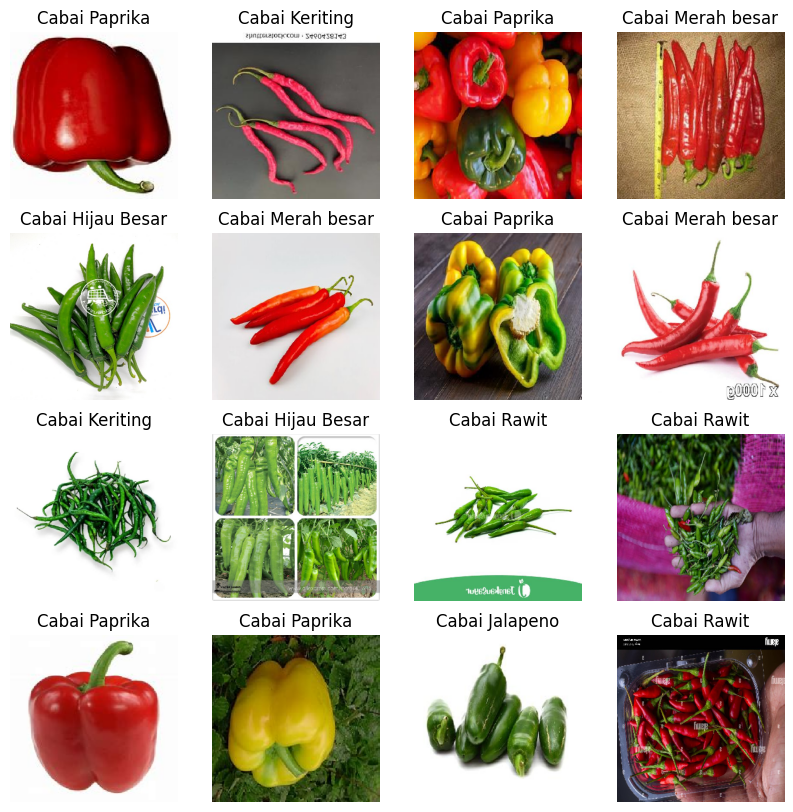

In [ ]:
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}

def plot_images(images, labels, class_labels, num_images=16):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        plt.title(class_labels[np.argmax(labels[i])])
        plt.axis('off')
    plt.show()

images, labels = next(train_generator)

plot_images(images, labels, class_labels, num_images=16)

## Visualisasi data Validation

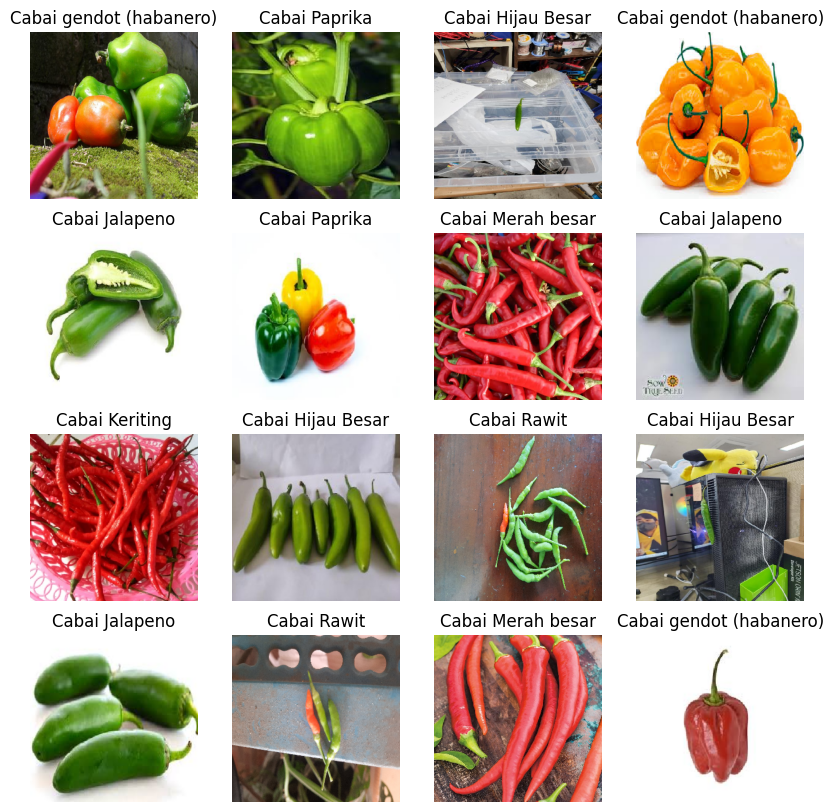

In [ ]:
images, labels = next(validation_generator)
plot_images(images, labels, class_labels, num_images=16)

In [ ]:
# from tensorflow.keras.models import Sequential
# model = Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(299, 299, 3)),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(128, (3,3), activation ='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(256, activation ='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(train_generator.num_classes, activation ='softmax')
# ])

# model.summary()

In [ ]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# history = model.fit(train_generator,
#     validation_data=validation_generator,
#     epochs=50)

## Transfer Learning Model

In [ ]:
from tensorflow.keras.applications import InceptionV3
pre_trained_model = InceptionV3(input_shape=(299, 299, 3), include_top=False, weights='imagenet')

for layer in pre_trained_model.layers:
    layer.trainable = False

feature_extraction = pre_trained_model.output

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
x = tf.keras.layers.GlobalAveragePooling2D()(feature_extraction)
x = tf.keras.layers.Dense(512, activation ='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(7, activation='softmax')(x)
tl_model = tf.keras.Model(pre_trained_model.input, x)

In [ ]:
tl_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalization[0][0

In [ ]:
tl_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
import datetime

checkpoint_dir = 'model_checkpoints'
log_dir = 'logs/fit/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath=f'{checkpoint_dir}/best_model.h5', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001),
    TensorBoard(log_dir=log_dir, histogram_freq=1)
]

In [ ]:
tl_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50
36/36 [==============================] - ETA: 0s - loss: 1.0986 - accuracy: 0.6144

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


36/36 [==============================] - 390s 11s/step - loss: 1.0986 - accuracy: 0.6144 - val_loss: 0.4646 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 2/50
36/36 [==============================] - 37s 1s/step - loss: 0.4179 - accuracy: 0.8584 - val_loss: 0.3208 - val_accuracy: 0.8993 - lr: 0.0010
Epoch 3/50
36/36 [==============================] - 38s 1s/step - loss: 0.3170 - accuracy: 0.8887 - val_loss: 0.3181 - val_accuracy: 0.8785 - lr: 0.0010
Epoch 4/50
36/36 [==============================] - 40s 1s/step - loss: 0.2623 - accuracy: 0.9158 - val_loss: 0.3333 - val_accuracy: 0.8715 - lr: 0.0010
Epoch 5/50
36/36 [==============================] - 40s 1s/step - loss: 0.2063 - accuracy: 0.9297 - val_loss: 0.3068 - val_accuracy: 0.8924 - lr: 0.0010
Epoch 6/50
36/36 [==============================] - 35s 1s/step - loss: 0.2040 - accuracy: 0.9252 - val_loss: 0.3781 - val_accuracy: 0.8542 - lr: 0.0010
Epoch 7/50
36/36 [==============================] - 34s 937ms/step - loss: 0.1829 - accurac

In [ ]:
tl_model.save('tl_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Evaluasi Model

In [ ]:
testing =  ImageDataGenerator(
    rescale = 1/255,
)

testing_generator = testing.flow_from_directory(validation_dir, target_size=(299, 299), shuffle = False)

Found 292 images belonging to 7 classes.


10/10 [==============================] - 9s 850ms/step


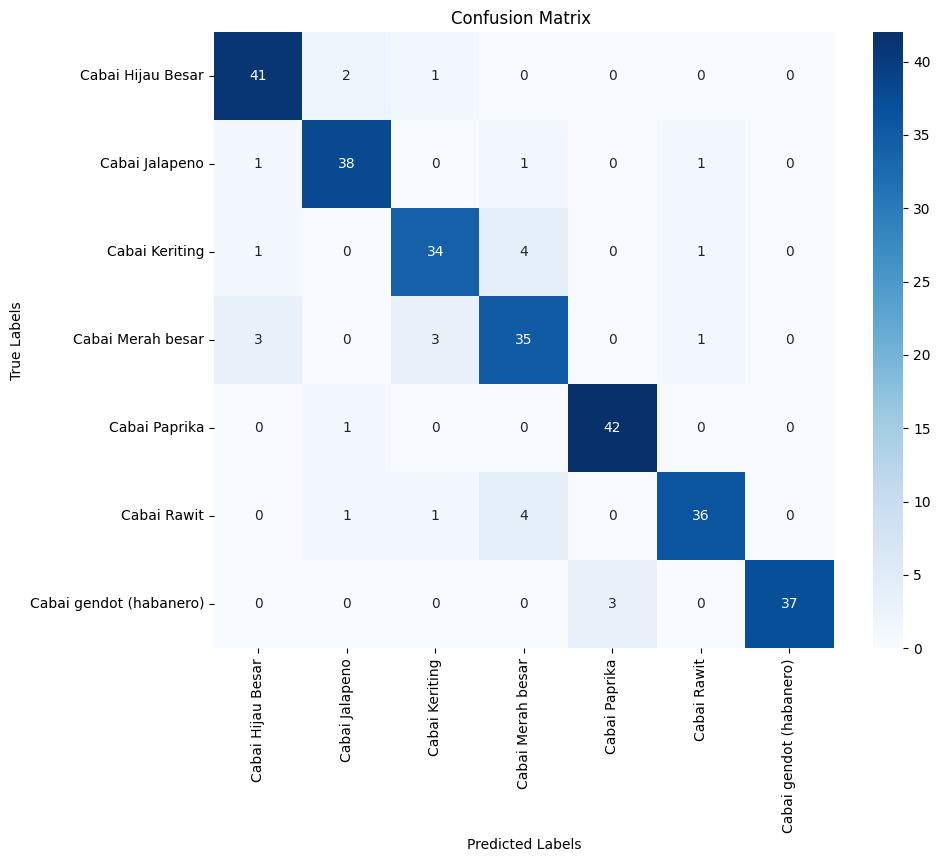

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

true_labels = testing_generator.classes
predicted_probabilities = tl_model.predict(testing_generator)

# Convert predicted probabilities to predicted class labels
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=testing_generator.class_indices, yticklabels=testing_generator.class_indices)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix ')
plt.show()

In [ ]:
class_indices = train_generator.class_indices
print(class_indices)  # Print the mapping to see the correspondence

# Create a reverse mapping from indices to class names
index_to_class = {v: k for k, v in class_indices.items()}
print(index_to_class)

{'Cabai Hijau Besar': 0, 'Cabai Jalapeno': 1, 'Cabai Keriting': 2, 'Cabai Merah besar': 3, 'Cabai Paprika': 4, 'Cabai Rawit': 5, 'Cabai gendot (habanero)': 6}
{0: 'Cabai Hijau Besar', 1: 'Cabai Jalapeno', 2: 'Cabai Keriting', 3: 'Cabai Merah besar', 4: 'Cabai Paprika', 5: 'Cabai Rawit', 6: 'Cabai gendot (habanero)'}


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
uploaded = files.upload()

for fn in uploaded.keys():
    img = image.load_img(fn, target_size=(299, 299))

    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)

    predicted_class_index = np.argmax(prediction[0])

    predicted_class_name = index_to_class[predicted_class_index]

    confidence = prediction[0][predicted_class_index]

    print(f"Predicted label: {predicted_class_name} with confidence {confidence:.2f}")

Saving 15_07_2022_01_54_32_cabe_hijau_keritingg.jpg to 15_07_2022_01_54_32_cabe_hijau_keritingg.jpg


In [ ]:
# model_save_path = '.h5'
# tl_model.save(model_save_path)
# from google.colab import files
# files.download(model_save_path)

## Convert model to TFJS

In [ ]:
import tensorflowjs as tfjs

In [ ]:
tfjs_model = tf.keras.models.load_model('/content/model_checkpoints/best_model.h5')

In [ ]:
tfjs_model.evaluate(testing_generator)

10/10 [==============================] - 10s 664ms/step - loss: 0.2479 - accuracy: 0.9007


[0.24793998897075653, 0.9006849527359009]

In [ ]:
tfjs.converters.save_keras_model(tfjs_model, 'tfjs_model')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import shutil
from google.colab import files
folder_path = '/content/tfjs_model'
shutil.make_archive('/content/tfjs_model', 'zip', folder_path)
files.download('/content/tfjs_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>